In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

In [2]:
## Hyperparams and metadata

N_ITERS = 1
NODES = 196591
EDGES = 950327

(196591, 196591)


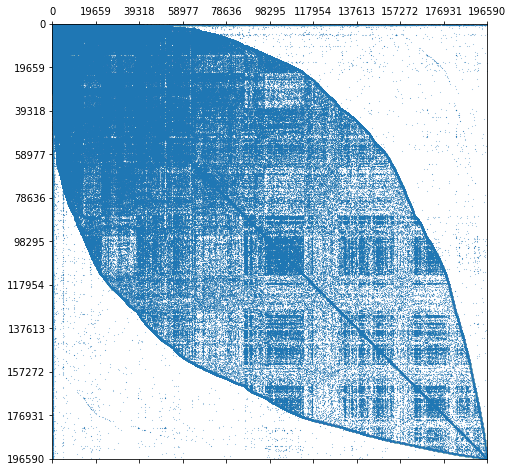

In [3]:
## Load data

adj_path = '../Dataset/adj_mat.npz'
s_mat = sp.load_npz(adj_path)
sm_shape = s_mat.shape
print(sm_shape)

# Visualize
plt.figure(figsize=(8, 8))
plt.spy(s_mat, markersize=0.1)
plt.xticks(np.arange(0, NODES, NODES // 10))
plt.yticks(np.arange(0, NODES, NODES // 10))
plt.show()

In [4]:
## S, R, A preprocessing 

# Set self-similarity values
self_sim = 10
s_mat.setdiag(self_sim)

# Make A and R CSR matrices
a_mat = sp.lil_matrix((NODES, NODES), dtype=np.int8).tocsr()
r_mat = sp.lil_matrix((NODES, NODES), dtype=np.int8).tocsr()

/home/mortarsynth/.local/lib/python3.6/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [5]:
## Update R

def update_r(s_mat, a_mat):
    r_mat = s_mat
    v_mat = s_mat + a_mat
    v_mat.setdiag(-120)
    v_mat.eliminate_zeros()
    
    v_rows, _ = v_mat.nonzero()
    v_rows_unique = np.unique(v_rows)
    for row_it in v_rows_unique:
        print(row_it)
        row_vals = v_mat[row_it]
        
        # calculate first minimum
        first_m = row_vals.argmax()
        f_val = row_vals[0, first_m]
        row_vals[0, first_m] = 120 
        
        # calculate second minimum
        second_m = row_vals.argmax()
        s_val = row_vals[0, second_m]
        
        # calculate R
        r_row = sp.lil_matrix((1, NODES), dtype=np.int8).tocsr()
        r_row[:] = f_val
        r_row[0, first_m] = s_val
        r_row.eliminate_zeros()
        r_mat[row_it] = r_mat[row_it] - r_row
        
    return r_mat

In [6]:
## Update A

def update_a(r_mat):
    r_diagonal = r_mat.diagonal()
    
    # calculate sum
    r_mat.setdiag(0) 
    r_mat_pos = r_mat
    r_mat_pos[r_mat_pos < 0] = 0
    r_mat_pos.eliminate_zeros()
    return 0

In [7]:
## Start iterations

for ittt in range(N_ITERS):
    r_test = update_r(s_mat, a_mat)
    
# Visualize
plt.figure(figsize=(8, 8))
plt.spy(r_test, markersize=0.1)
plt.xticks(np.arange(0, NODES, NODES // 10))
plt.yticks(np.arange(0, NODES, NODES // 10))
plt.show()

0
1


/home/mortarsynth/.local/lib/python3.6/site-packages/scipy/sparse/_index.py:118: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190


KeyboardInterrupt: 